In [ ]:
###################### Install all necessary libraries #########################

from google.colab import files
!pip install yfinance --upgrade --no-cache-dir -q
!pip install yahoo_fin -q
!pip install yahoo_fin --upgrade -q
!pip install requests_html -q
!pip install wordcloud --upgrage --quiet
!pip install nltk -q

################################################################################

     |████████████████████████████████| 6.3MB 37.7MB/s 
     |████████████████████████████████| 81kB 8.9MB/s 
     |████████████████████████████████| 92kB 12.0MB/s 
     |████████████████████████████████| 81kB 12.0MB/s 
     |████████████████████████████████| 81kB 11.3MB/s 
ERROR: pyppeteer 0.2.5 has requirement urllib3<2.0.0,>=1.25.8, but you'll have urllib3 1.24.3 which is incompatible.
     |████████████████████████████████| 143kB 30.8MB/s 
ERROR: requests 2.23.0 has requirement urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you'll have urllib3 1.26.5 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/

In [ ]:
# import sys
# from google.colab import drive
# drive.mount('/content/drive')
# sys.path.insert(0, '/content/drive/MyDrive/AnalyzePosts.py')
# sys.path.insert(0, '/content/drive/MyDrive/DataMining.py')

In [ ]:
#########################################  DATA REQUESTS #############################################

# To provide current date and time in an format understandable by our API
from datetime import datetime
from datetime import timedelta

##########################################  DATA MINING ##############################################
import DataMining as get_data
from yahoo_fin.stock_info import get_data as get_val

#######################################  DATA MANIPULATION ###########################################

import pandas as pd
import AnalyzePosts as analyze
import sqlite3

#######################################  DATA VISUALIZATION ###########################################

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
from plotly.graph_objs import Scatter3d, Layout, Scene
import plotly
from wordcloud import WordCloud, STOPWORDS

#######################################################################################################


/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.5) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



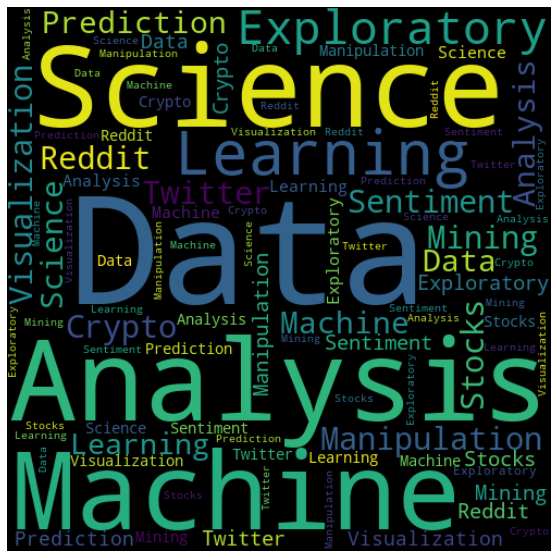

In [ ]:
#Each of the word in the message will be review
word = " ".join(review for review in ["Data","Analysis","Science","Machine","Learning","Exploratory","Manipulation","Mining","Sentiment","Stocks","Crypto","Reddit","Twitter","Visualization","Prediction", "Data","Analysis","Science","Machine","Learning","Exploratory","Manipulation","Mining","Sentiment","Stocks","Crypto","Reddit","Twitter","Visualization","Prediction"])

#Creating a word cloud 
wordcloud = WordCloud(width = 500, height =500 , background_color="black",min_font_size = 10,repeat=True).generate(word)

plt.figure( figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('Market_Analysis.png')
plt.show()
# wordcloud.to_image()

In [ ]:
def CombinedAnalysis_Stocks(stocks, amt, time):
    """
    Get the line plots of top ```amt``` treding stocks for the last ```time``` days.  

    Parameters
    ----------
    stocks : pd.DataFrame
    amt    : int
    time   : int

    Returns
    -------
    Graphs
    """
    ######################## Get the Top ```amt``` values ######################

    try:
      top_stocks = stocks.sort_values('Number_Of_Occurences', ascending=False).head(amt)
    except:
      top_stocks = stocks.head(amt)
    
    ############################ Collect Data and Plot #########################
    
    # Create an empty data Frame to store retreived data
    data_stock = pd.DataFrame(columns=top_stocks.columns)

    for tick in top_stocks['Ticker']:
      tick = tick.replace(" ","")
      try:
        
        # Collect data from yahoo finance function get_data using the stock ticker
        # Use pd.concat to store all data in one DataFrame
        data_stock = pd.concat([get_val(tick,
                              datetime.now() - timedelta(days=time),
                              datetime.date(datetime.now()), 
                              index_as_date=True),data_stock],
                            axis = 0)
      
      except:
        pass
    
    # Plot the line graph of all the stocks togather
    fig = px.line(data_stock, 
                  x=data_stock.index, 
                  y=data_stock['close'], 
                  color="ticker", 
                  title = "Top Trending Stocks Twitter")
    
    fig.update_traces(mode="markers+lines")
    fig.update_xaxes(title="Date")
    fig.update_layout(
        hoverlabel=dict(
          bgcolor="white",
          font_size=16,
          font_family="Rockwell"
          )
    ) 
    plotly.offline.plot(fig, filename='AnalyzeStocks.html')
    # Display result (graph)
    fig.show()
    
    ############################################################################

In [ ]:
def Stocks_linePlots(stocks, amt, time):
    """
    Get the line plots of top ```amt``` treding stocks for the last ```time``` days.
    Parameters
    ----------
    stocks : pd.DataFrame
    amt    : int
    time   : int
    Returns
    -------
    Graphs
    """
    ######################## Get the Top ```amt``` values ######################

    try:
        top_stocks = stocks.sort_values('Number_Of_Occurences', ascending=False).head(amt)
    except:
        top_stocks = stocks

        ############################ Collect Data and Plot #########################

    for tick in top_stocks['Ticker']:
        tick = tick.replace(" ", "")
        try:
            # Collect data from yahoo finance function get_data using the stock ticker
            data_stock = get_val(tick,
                                  datetime.now() - timedelta(days=time),
                                  datetime.date(datetime.now()),
                                  index_as_date=True)

            # Start plotting the line graph in plotly.express
            fig = px.line(data_stock,
                          x=data_stock.index,
                          y=data_stock['close'],
                          color="ticker")

            fig.update_traces(mode="markers+lines")
            fig.update_layout(
                hoverlabel=dict(
                    bgcolor="white",
                    font_size=16,
                    font_family="Rockwell"
                ),
                title = tick
            )
            fig.update_xaxes(title=tick)
            plotly.offline.plot(fig, filename='Stocks_linePlots.html')
            # ret_Graph('./IndividualLine.html')
            # Display the result (graph)
            fig.show()
        except:
            pass

    ############################################################################

In [ ]:
def Stocks_candlePlots(stocks, amt, time):
    """
    Get the plots of top ```amt``` treding stocks for the last ```time``` days.
    Parameters
    ----------
    stocks : pd.DataFrame
    amt    : int
    time   : int
    Returns
    -------
    Graphs
    """
    ######################## Get the Top ```amt``` values ######################

    try:
        top_stocks = stocks.sort_values('Number_Of_Occurences', ascending=False).head(amt)
    except:
        top_stocks = stocks

    ############################ Collect Data and Plot #########################

    for tick in top_stocks['Ticker']:
        tick = tick.replace(" ", "")
        try:
            # Collect data from yahoo finance function get_data using the stock ticker
            df = get_val(tick,
                          datetime.now() - timedelta(days=time),
                          datetime.date(datetime.now()),
                          index_as_date=True)

            # Start plotting the graphs in plotly.graph.objects
            fig = go.Figure(data=[go.Candlestick(x=df.index,
                                                 open=df['open'],
                                                 high=df['high'],
                                                 low=df['low'],
                                                 close=df['close'])])

            fig.update_layout(
                yaxis_title=tick,
                xaxis_title='Date',
                title = tick
            )
            plotly.offline.plot(fig, filename='Stocks_candlePlots.html')
            # ret_Graph('./IndividualAnalysis.html')
            # Display the result
            fig.show()

        except:
            pass

    ############################################################################

In [ ]:
def Popular_Crypto(crypto_data, amt):
    """
    Get the growth rate of most popular ```amt``` crypto's in the last 24h and plot their graphs
    Parameters
    ----------
    crypto_data : pd.DataFrame
    amt         : int
    Returns
    -------
    Graph
    """
    ############################ Collect Data Req ##############################

    popular_crypto_data = crypto_data.sort_values('volume_24', ascending=False).head(amt)

    ################################## Plot 1 ##################################

    ax = plt.subplots(figsize=(13, 7))
    sns.set(style="whitegrid", color_codes=True)
    sns.barplot(data=popular_crypto_data,
                x=popular_crypto_data['Name'],
                y=popular_crypto_data['percent_change_24h'],
                palette="Blues_d",
                label="percent_change_24h")
    plt.xticks(rotation='vertical')
    plt.title('Most Popular Crypto')
    plt.savefig('Popular.png')
    # Display the result
    plt.show()

    ############################################################################

In [ ]:
def Growing_Crypto(crypto_data, amt, period):
    """
    Get the top ```amt``` crypto with maximum growth in the last 24h and plot their graphs
    Parameters
    ----------
    crypto_data : pd.DataFrame
    amt         : int
    period      : int
    Returns
    -------
    Graphs
    """
    ########################### Collect Data Req ###############################

    top_crypto_data = crypto_data.sort_values('percent_change_24h' if period == 24 else 'percent_change_7d',
                                              ascending=False).head(amt)

    ################################# Plot 1 ###################################
    f, ax = plt.subplots(figsize=(13, 7))

    if period == 24:
        sns.barplot(data=top_crypto_data,
                    x=top_crypto_data['Name'],
                    y=top_crypto_data['percent_change_24h'],
                    palette="gist_earth",  # YlOrRd_r
                    label="percent_change_24h")
    else:
        sns.barplot(data=top_crypto_data,
                    x=top_crypto_data['Name'],
                    y=top_crypto_data['percent_change_7d'],
                    palette="gist_earth",  # YlOrRd_r
                    label="percent_change_7d")

    plt.xticks(rotation='vertical')
    plt.title('Most Growing Crypto\'s')
    ax.legend(fontsize=14)

    ################################# Plot 2 ###################################

    if period == 24:
        fig = px.bar(top_crypto_data, x='Name', y='percent_change_24h',
                     hover_data=['Name', 'percent_change_24h', 'Price', 'Circulating_Supply', 'Trading_Volume',
                                 'volume_24'],
                     color='Name',
                     labels={'pop': 'Crypto Currencies'},
                     height=500,
                     template='ggplot2', title='Top Crypto\'s')
    else:
        fig = px.bar(top_crypto_data, x='Name', y='percent_change_7d',
                     hover_data=['Name', 'percent_change_7d', 'Price', 'Circulating_Supply', 'Trading_Volume',
                                 'volume_24'],
                     color='Name',
                     labels={'pop': 'Crypto Currencies'},
                     height=500,
                     template='ggplot2', title='Most Growing Crypto\'s')
    plotly.offline.plot(fig, filename='Growing_Crypto.html')
    # ret_Graph('./topCrypto.html')
    return fig.show()

    ############################################################################

In [ ]:
def Growing_Crypto_Investable(crypto_data, amt, period):
    """
    Get the top ```amt``` crypto with maximum growth in the last 24h and plot their graphs
    Parameters
    ----------
    crypto_data : pd.DataFrame
    amt         : int
    period      : int
    Returns
    -------
    Graphs
    """
    ########################### Collect Data Req ###############################

    top_crypto_data = crypto_data.sort_values('percent_change_24h' if period == 24 else 'percent_change_7d',
                                              ascending=False).head(amt)

    ################################# Plot 1 ###################################
    f, ax = plt.subplots(figsize=(13, 7))

    if period == 24:
        sns.barplot(data=top_crypto_data,
                    x=top_crypto_data['Name'],
                    y=top_crypto_data['percent_change_24h'],
                    palette="gist_earth",  # YlOrRd_r
                    label="percent_change_24h")
    else:
        sns.barplot(data=top_crypto_data,
                    x=top_crypto_data['Name'],
                    y=top_crypto_data['percent_change_7d'],
                    palette="gist_earth",  # YlOrRd_r
                    label="percent_change_7d")

    plt.xticks(rotation='vertical')
    plt.title('Growing and Investable Crypto\'s')
    ax.legend(fontsize=14)

    ################################# Plot 2 ###################################

    if period == 24:
        fig = px.bar(top_crypto_data, x='Name', y='percent_change_24h',
                     hover_data=['Name', 'percent_change_24h', 'Price', 'Liquidity', 'Circulating_Supply',
                                 'Trading_Volume', 'volume_24'],
                     color='Name',
                     labels={'pop': 'Crypto Currencies'},
                     height=500,
                     template='ggplot2', title='Top Crypto\'s')
    else:
        fig = px.bar(top_crypto_data, x='Name', y='percent_change_7d',
                     hover_data=['Name', 'percent_change_7d', 'Price', 'Liquidity', 'Circulating_Supply',
                                 'Trading_Volume', 'volume_24'],
                     color='Name',
                     labels={'pop': 'Crypto Currencies'},
                     height=500,
                     template='ggplot2', title='Growing and Investable Crypto\'s')
    plotly.offline.plot(fig, filename='Growing_Crypto_Investable.html')
    # ret_Graph('./bestCrypto.html')
    fig.show()

    ############################################################################

In [ ]:
def Analyze_Crypto_Data(liquidable, time):
    """
    Represent the Top Most Promising Cryptos in a 3d scatter plot.
    Parameters
    ----------
    liquidable : pd.DataFrame
    time       : int

    Returns
    -------
    Graph
    """
    ############################ Get the Data we require #######################

    liquidable = liquidable.sort_values('percent_change_24h' if time == 24 else 'percent_change_7d',
                                        ascending=False).head(20)

    ############################### Plot 1 #####################################

    fig = px.scatter_3d(liquidable,
                        x='Price',
                        y='Circulating_Supply',
                        z='percent_change_24h' if time == 24 else 'percent_change_7d',
                        color='Name',
                        opacity=0.8,
                        hover_data=['Name', 'Price'],
                        size='Liquidity',
                        title="Most Promising Crypto Currencies",
                        )
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0), template="plotly_dark")
    plotly.offline.plot(fig, filename='my3Dplot1.html')
    # ret_Graph('./my3Dplot1.html')
    fig.show()

    ################################ Plot 2 ####################################

    percent_change, Circulating_Supply, Price = liquidable.percent_change_24h if time == 24 else liquidable.percent_change_7d, liquidable.Circulating_Supply, liquidable.Price

    layout = Layout(scene=Scene(
        xaxis={'title': 'Price'},
        yaxis={'title': 'Circulating Supply'},
        zaxis={'title': 'percent_change'}))

    fig = go.Figure(data=[go.Scatter3d(
        x=Price,
        y=Circulating_Supply,
        z=percent_change,
        mode='markers',
        marker=dict(
            size=8,
            color=Price,
            colorscale='Viridis',
            opacity=0.5
        )
    )], layout=layout)
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
    plotly.offline.plot(fig, filename='my3Dplot2.html')
    # ret_Graph('./my3Dplot2.html')
    fig.show()

    ############################################################################

In [ ]:
def Analyze_Stocks_Posts(data, parm1, parm2, parm3):
    """
    Plot the effect of social media post using the parameters ```parm1```, ```parm2```, and ```parm3```.
    We use px.scatter_3d() to get the 3-Dimensional Visualization of the growth rate of stocks with
    respect to the number of occurences / number of upvotes.
    Parameters
    ----------
    data  : pd.DataFrame
    parm1 : str
    parm2 : str
    parm3 : str
    
    Returns
    -------
    Graph
    """
    ################################# Plot 1 ###################################
    fig = px.scatter_3d(data.head(10), 
                        x=parm1, 
                        y=parm2, 
                        z=parm3,
                        color=parm2, 
                        opacity=0.8,
                        hover_data = ['Name','Price'], 
                        title = "Most Promising Crypto Currencies",
    )
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0), template = "plotly_dark")
    plotly.offline.plot(fig, filename='Reddit_Stocks.html')
    fig.show()
    
    ############################################################################

In [ ]:
def Analyze_Crypto_Posts(data, parm1, parm2, parm3):
    """
    Plot the effect of social media post using the parameters ```parm1```, ```parm2```, and ```parm3```.
    We use px.scatter_3d() to get the 3-Dimensional Visualization of the growth rate of cryptos with
    respect to the number of occurences / number of upvotes.
    Parameters
    ----------
    data  : pd.DataFrame
    parm1 : str
    parm2 : str
    parm3 : str
    
    Returns
    -------
    Graph
    """
    ################################# Plot 1 ###################################

    fig = px.scatter_3d(data.head(10),
                        x=parm1,
                        y=parm2,
                        z=parm3,
                        color=parm2,
                        opacity=0.8,
                        hover_data=['Name', 'Price', 'percent_change_24h'])
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0), template="plotly_dark")
    plotly.offline.plot(fig, filename='Reddit_Crypto.html')
    fig.show()

    ############################################################################

In [ ]:
def plot_pie(Stock_Name, pos, neg, neu):
    """
    Parameters
    ----------
    Stock_Name : str
    pos        : int 
    neg        : int
    neu        : int

    Returns
    -------
    Graph
    """
    labels = 'Positive', 'Negative', 'Neutral'
    sizes = [pos,neg, neu]
    
    colors = ( "green", "red", "yellow") 
    fig1, ax1 = plt.subplots()
    explode = (0, 0.1, 0) 
    
    ax1.pie(sizes, colors = colors, explode=explode, labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
    patches, texts, auto = ax1.pie(sizes, colors=colors, shadow=True, startangle=90,explode=explode, autopct='%1.1f%%' )
    plt.title(Stock_Name)
    plt.legend(patches, labels, loc="best")
    plt.savefig("pie.png")
    plt.show()

# Run analysis on Twitter and Reddit or just Reddit 

In [ ]:
# Note: The complete analysis will take a little over 30 mins to complete 
# Due to the extensive time taken by twitter API
complete = True if int(input("Would you like to run the complete Analysis or have a partial run (1, 0) ? ")) == 1 else False

Would you like to run the complete Analysis or have a partial run (1, 0) ? 0


# Stocks Analysis

In [ ]:
############################ Establish credentials #############################

# Enter your Reddit Credentials 
client_id, client_secret = '', ''
username, password = '',''

# Enter your credentials here Twitter 
consumer_key, consumer_secret = '',''
access_key, access_secret = '',''

################################################################################

In [ ]:
######################## Get Posts and Tweets for stocks #######################

# Retreive posts from reddit for stocks
reddit_posts = pd.DataFrame()
subreddits_stocks = ["wallstreetbets", "stocks", "investing", "securityanalysis", "StockMarket"]
for subreddit in subreddits_stocks:
    new_data = get_data.Reddit_API(client_id, client_secret, username, password, subreddit, 10000)
    reddit_posts = reddit_posts.append(new_data)

# Retreive tweets from twitter 
if complete:
  df_tweets = get_data.getTweets(consumer_key, consumer_secret, access_key, access_secret, hashtags="#stocks OR #StockToBuy OR #trading OR #stockmarket OR #investing", target_date='2021-04-30', total_tweets = 2500, attempts = 1)

################################################################################

In [ ]:
############################### Retreive Stocks Info ###########################
 
stocks = get_data.stocks()
common_words = get_data.Common_words()
top_gainers_today = get_data.Gainers_Or_Losers(1)
top_gainers_today.rename(columns={'ticker': 'Ticker'}, inplace=True)

################################################################################

In [ ]:
####################### Analyze Reddit Posts and Tweets ########################

Analysis_reddit = analyze.Analyze_Reddit_Posts(stocks, reddit_posts, common_words)
if complete:
  Analysis_tweets = analyze.Analyze_tweets(stocks,df_tweets, common_words)
  Analysis_tweets = Analysis_tweets.sort_values('Number_Of_Occurences', ascending=False)
  index_names = Analysis_tweets[(Analysis_tweets['Number_Of_Occurences'] >= 10)].index
  Analysis_tweets.drop(index_names, inplace = True)

################################################################################

In [ ]:
Analysis_reddit.sort_values('Number_Of_Occurences', ascending=False)

,Stock_Name,Ticker,Number_Of_Occurences,Upvotes,Positive,Positive_Upvotes,Negative,Negative_Upvotes,Neutral,Neutral_Upvotes
142,United,UG,41,7434.0,32,7418.0,9,16.0,0,0
5,Amazon,AMZN,36,16824.0,36,16824.0,0,0.0,0,0
15,Biogen,BIIB,34,2285.0,34,2285.0,0,0.0,0,0
52,Ever,EVK,32,10760.0,32,10760.0,0,0.0,0,0
139,Twitter,TWTR,29,11841.0,29,11841.0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
51,Equinix,EQIX,1,1.0,1,1.0,0,0.0,0,0
63,Generac Holdings,GNRC,1,1.0,1,1.0,0,0.0,0,0
86,Cheniere Energy,LNG,1,78.0,1,78.0,0,0.0,0,0
118,Phillips 66,PSX,1,1.0,1,1.0,0,0.0,0,0


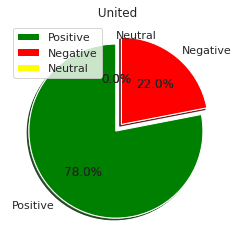

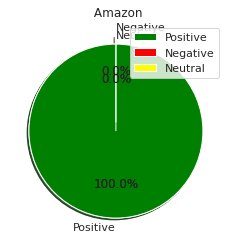

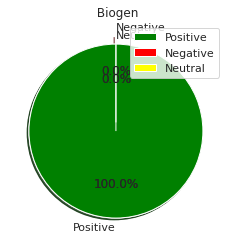

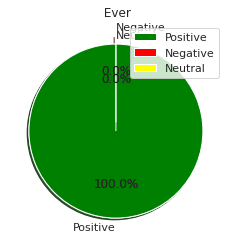

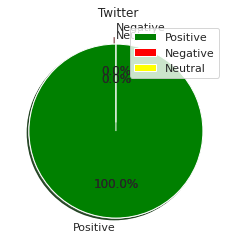

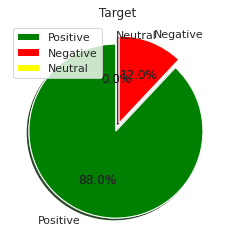

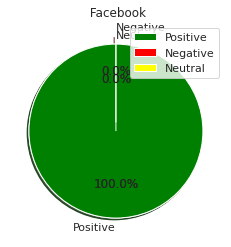

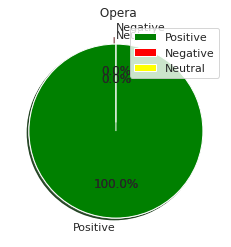

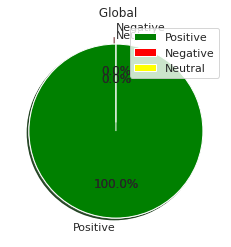

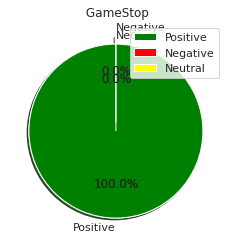

In [ ]:
count = 0
for i in Analysis_reddit.sort_values('Number_Of_Occurences', ascending=False).iterrows():
    if i[1]['Positive'] > 1:
      plot_pie(i[1]['Stock_Name'], i[1]['Positive'], i[1]['Negative'], i[1]['Neutral'])
      count += 1
    if count>=10:
      break

In [ ]:
########################## Data Visualization ##################################

# Result of Reddit 
CombinedAnalysis_Stocks(Analysis_reddit, 20, 365)
Stocks_candlePlots(Analysis_reddit, 10, 365)

# 3D projection of relation between Occurences / Upvotes vs Price 
# Analyze_Stocks_Posts(Analysis_reddit, 'Price', 'Total_Upvotes', 'Number_Of_Occurences')

# 3D projection of relation between Occurences / Retweets vs Price 
# Analyze_Stocks_Posts(Analysis_tweets, 'Price', 'Total_Retweets', 'Number_Of_Occurences')


In [ ]:
# Result of Twitter
if complete:
  CombinedAnalysis_Stocks(Analysis_tweets, 20, 365)
  Stocks_candlePlots(Analysis_tweets, 20, 365)

In [ ]:
# Result of Market Performance
CombinedAnalysis_Stocks(top_gainers_today, 10, 30)
Stocks_candlePlots(top_gainers_today, 20, 365)

# CRYPTO'S

In [ ]:
######################## Get Posts and Tweets for cryptos ######################

# Retreive posts from reddit for crypto
reddit_crypto = pd.DataFrame()
subreddits_crypto = ["Bitcoinmarkets", "Ethfinance", "CryptoMarkets", "CryptoCurrencyTrading", "ethtrader",
                     "Cryptocurrency", "Crypto_Currency_News", "dogecoin", "Bitcoin", "wallstreetbets"]
for subreddit in subreddits_crypto:
    new_data = get_data.Reddit_API(client_id, client_secret, username, password, subreddit, 10000)
    reddit_crypto = reddit_crypto.append(new_data)
if complete:
  df_tweets_crypto = get_data.getTweets(consumer_key, consumer_secret, access_key, access_secret, hashtags="#crypto OR #cryptocurrency OR #blockchain OR #bitcoin OR #ethereum", target_date='2021-05-2', total_tweets = 2500, attempts = 1)

################################################################################

In [ ]:
############################## Get Crypto rates ################################

crypto_data = get_data.CoinBase_Api()
crypto_data = crypto_data[crypto_data.Circulating_Supply > 0]
crypto_data = crypto_data[crypto_data.volume_24 > 200000]
liquidable = get_data.crypto_liquidity(crypto_data)

################################################################################

In [ ]:
####################### Analyze Reddit Posts and Tweets ########################

RedditCrypto_Analysis = analyze.Analyze_Reddit_Crypto(crypto_data, reddit_crypto, common_words)
RedditCrypto_Analysis = RedditCrypto_Analysis.sort_values('Number_Of_Occurences', ascending=False)
RedditCrypto_Analysis = pd.merge(left=crypto_data, right=RedditCrypto_Analysis, how='left', left_on='Name', right_on='Name')

if complete:
  tweets_crypto = analyze.Analyze_Tweets_Crypto(crypto_data, df_tweets_crypto, common_words)
  tweets_crypto = pd.merge(left=crypto_data, right=tweets_crypto, how='left', left_on='Name', right_on='Name')

################################################################################

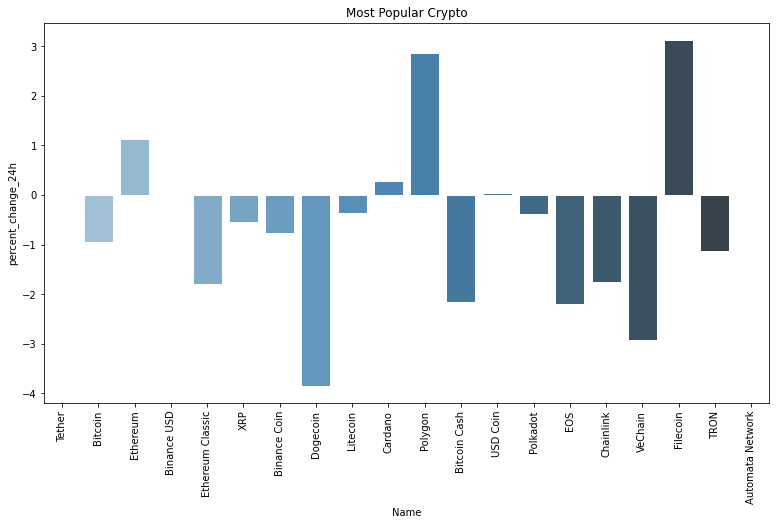

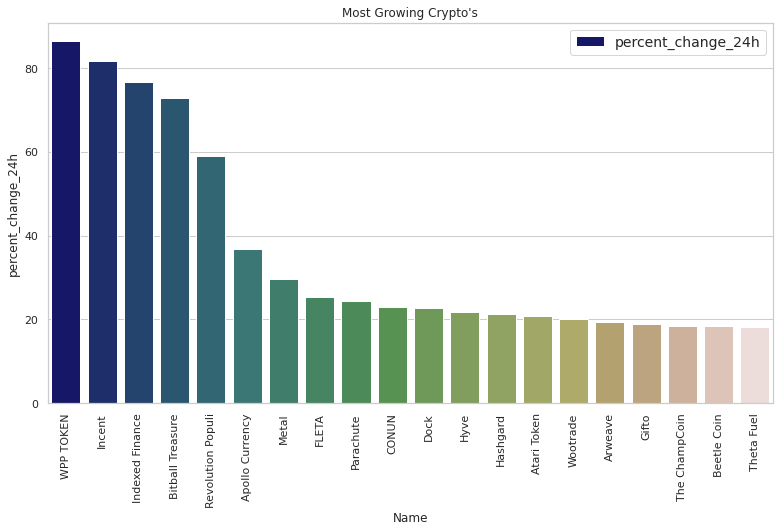

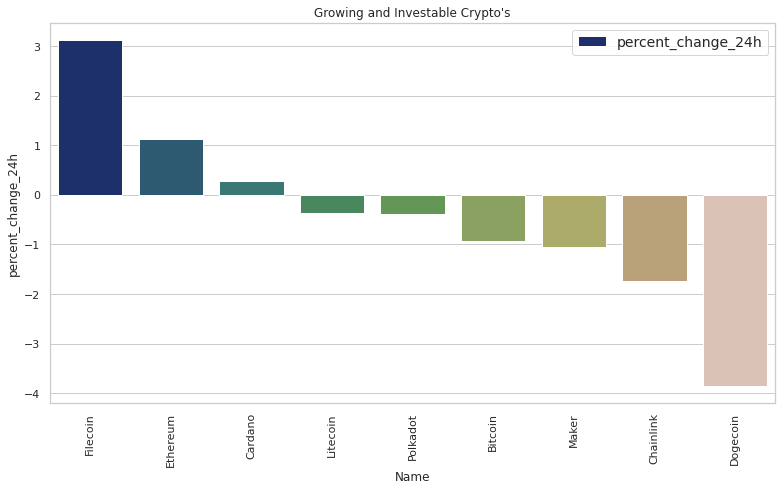

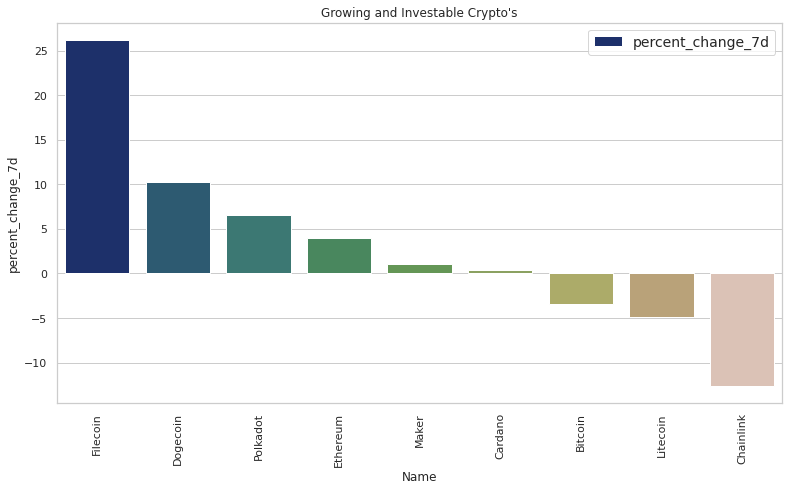

In [ ]:
######################### Plot Graphs for Crpyto Analysis #######################

Popular_Crypto(crypto_data=crypto_data, amt=20)
Growing_Crypto(crypto_data=crypto_data, amt=20, period=24)


# Best Crypto's available with highest growth rate in last 24 hours 
Growing_Crypto_Investable(liquidable, 20, 24)

# Best Crypto's available with highest growth rate in last 7 days 
Growing_Crypto_Investable(liquidable, 20, 7)



################################################################################



## 3-D Graphs

In [ ]:
# Analyze General Crypto Data
Analyze_Crypto_Data(liquidable, 7)

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:494: DeprecationWarning:

plotly.graph_objs.Scene is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Scene




In [ ]:
# Analyze Crypto's based on Reddit Posts
Analyze_Crypto_Posts(RedditCrypto_Analysis, 'Price', 'Total_Upvotes', 'Number_Of_Occurences')

In [ ]:
# Analyze Crypto's based on Tweets 
if complete:
  Analyze_Crypto_Posts(tweets_crypto, 'Price', 'Total_Retweets', 'Number_Of_Occurences')

In [ ]:
pos = 0
neg = 0
neu = 0
for i in Analysis_reddit.iterrows():
  if i[1]['Positive_Upvotes'] > 0:
    pos += i[1]['Positive_Upvotes']
  if i[1]['Negative_Upvotes'] > 0:
    neg += i[1]['Negative_Upvotes']
  if i[1]['Neutral_Upvotes']:
    neu += i[1]['Neutral_Upvotes']

In [ ]:
print(pos,neg,neu)

407175.0 26279.0 0


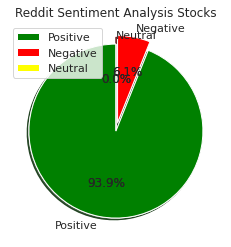

In [ ]:
labels = 'Positive', 'Negative', 'Neutral'
sizes = [pos,neg, neu]

colors = ( "green", "red", "yellow") 
fig1, ax1 = plt.subplots()
explode = (0, 0.1, 0) 

ax1.pie(sizes, colors = colors, explode=explode, labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
patches, texts, auto = ax1.pie(sizes, colors=colors, shadow=True, startangle=90,explode=explode, autopct='%1.1f%%' )
plt.title("Reddit Sentiment Analysis Stocks")
plt.legend(patches, labels, loc="best")
plt.savefig("pie.png")
plt.show()

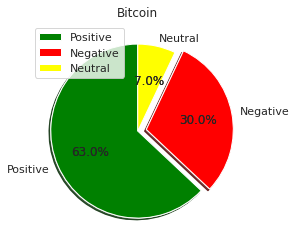

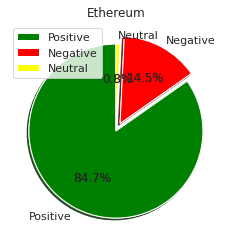

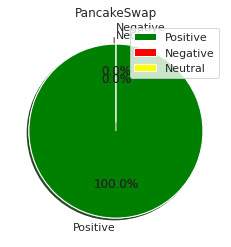

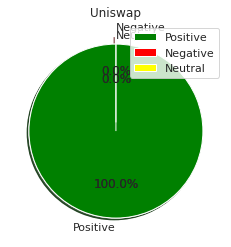

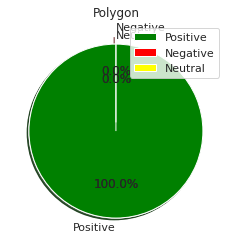

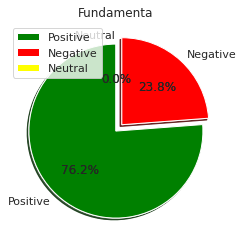

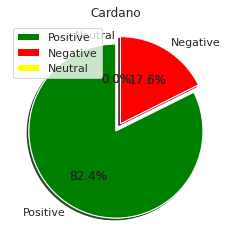

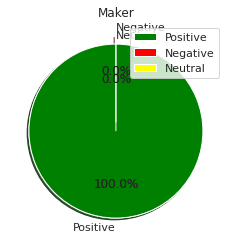

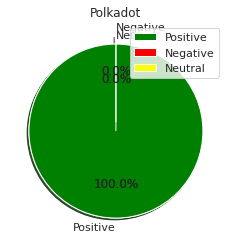

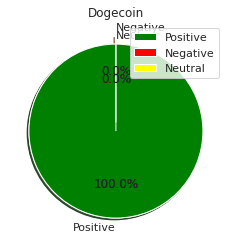

In [ ]:
count = 0
for i in RedditCrypto_Analysis.sort_values('Number_Of_Occurences', ascending=False).iterrows():
    if i[1]['Positive'] > 1:
      plot_pie(i[1]['Name'], i[1]['Positive'], i[1]['Negative'], i[1]['Neutral'])
      count += 1
    if count>=10:
      break

In [ ]:
reddit_posts.to_csv("Reddit_Posts.csv")
if complete:
  df_tweets.to_csv("Tweets.csv")

# Analyzing the Data using Linear Regression [ML]

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torch.utils.data import DataLoader, TensorDataset, random_split
from torch.utils.data import DataLoader

In [ ]:
# Get the test data we require and the crypto must be trending 
test_reddit = RedditCrypto_Analysis[['Name', 'Price', 'Total_Upvotes','Positive_Upvotes', 'Negative_Upvotes', 'Neutral_Upvotes', 'Number_Of_Occurences', 'percent_change_24h','percent_change_7d']]
test_reddit = test_reddit[test_reddit['Number_Of_Occurences']>10]
if complete:  
    test_twitter = tweets_crypto[['Name', 'Price', 'Total_Retweets', 'Number_Of_Occurences', 'percent_change_24h','percent_change_7d','Positive_Retweets', 'Negative_Retweets','Neutral_Retweets']]
    test_twitter = test_twitter[test_twitter['Number_Of_Occurences']>10]

In [ ]:
test_reddit

,Name,Price,Total_Upvotes,Positive_Upvotes,Negative_Upvotes,Neutral_Upvotes,Number_Of_Occurences,percent_change_24h,percent_change_7d
0,Bitcoin,35520.541159,52392.0,46594.0,5545.0,253.0,327.0,-0.940608,-3.386041
1,Ethereum,2718.766574,20354.0,19756.0,598.0,0.0,131.0,1.124808,3.928978
4,Cardano,1.669337,739.0,696.0,43.0,0.0,17.0,0.277515,0.378908
5,Dogecoin,0.357145,2696.0,2696.0,0.0,0.0,13.0,-3.852253,10.250789
8,Polkadot,23.791420,668.0,668.0,0.0,0.0,14.0,-0.390060,6.504155
9,Uniswap,26.062000,1692.0,1692.0,0.0,0.0,39.0,1.271569,-4.404582
15,Polygon,1.599802,1059.0,1059.0,0.0,0.0,23.0,2.864183,-12.825342
29,Maker,3538.777077,923.0,923.0,0.0,0.0,16.0,-1.057779,1.077136
30,PancakeSwap,18.977628,1425.0,1425.0,0.0,0.0,58.0,2.133098,8.400688
714,Decentr,0.145982,600.0,600.0,0.0,0.0,11.0,-6.009043,3.325732


In [ ]:
if complete:
    test_twitter

In [ ]:
input_size = 5
output_size = 1
batch_size = 5

In [ ]:
chosen = True if int(input("What would you like to perform linear regression on reddit (1) or twitter (0) (if chosen true above)?")) == 1 else False

What would you like to perform linear regression on reddit (1) or twitter (0) (if chosen true above)?1


In [ ]:
conn = sqlite3.connect('/content/reddit.db')
curr = conn.cursor()

In [ ]:
curr.execute("""Select * From DATA""")

In [ ]:
df = pd.read_sql_query("SELECT * from DATA", conn)

In [ ]:
df

,Name,Price,Total_Upvotes,Positive_Upvotes,Negative_Upvotes,Neutral_Upvotes,Number_Of_Occurences,percent_change_24h,percent_change_7d
0,Bitcoin,3.787498e+04,38840,28098,6426,4316,300,7.688801,-15.978064
1,Ethereum,2.537196e+03,18507,1197,17048,262,109,18.797855,-26.238698
2,Cardano,1.482228e+00,383,36,347,0,11,9.124493,-28.662384
3,Dogecoin,3.384393e-01,27888,371,27515,2,25,11.038212,-32.360176
4,Uniswap,2.353051e+01,704,17,687,0,15,34.602831,-32.762033
5,PancakeSwap,1.647549e+01,1490,544,716,230,149,21.677042,-41.345908
6,Symbol,2.132603e-01,240,202,36,2,22,4.828727,-32.833665
7,WHALE,1.086505e+01,129,17,43,69,41,14.451125,-42.314302
8,Strong,1.097979e+02,211,0,22,189,17,11.021161,-23.352084
9,Decentr,1.497120e-01,416,350,41,25,35,7.098183,-42.318004


In [ ]:
conn.close()

In [ ]:
test_reddit = df

In [ ]:
categorical_cols = ['Name']
if chosen:
  input_cols = input_cols = ['Positive_Upvotes','Negative_Upvotes','Neutral_Upvotes', 'Number_Of_Occurences','Price' ]
else:
  input_cols = ['Positive_Retweets','Negative_Retweets','Neutral_Retweets', 'Number_Of_Occurences','Price' ]
output_cols = ['percent_change_7d']

In [ ]:
def dataframe_to_arrays(dataframe):
    # Make a copy of the original dataframe
    dataframe1 = dataframe.copy(deep=True)
    # Convert non-numeric categorical columns to numbers
    for col in categorical_cols:
        dataframe1[col] = dataframe1[col].astype('category').cat.codes
    # Extract input & outupts as numpy arrays
    inputs_array = dataframe1[input_cols].to_numpy()
    targets_array = dataframe1[output_cols].to_numpy()
    return inputs_array, targets_array

In [ ]:
if chosen:
  inputs_array, targets_array = dataframe_to_arrays(test_reddit)
else:
  inputs_array, targets_array = dataframe_to_arrays(test_twitter)
inputs_array, targets_array

(array([[2.80980000e+04, 6.42600000e+03, 4.31600000e+03, 3.00000000e+02,
         3.78749800e+04],
        [1.19700000e+03, 1.70480000e+04, 2.62000000e+02, 1.09000000e+02,
         2.53719583e+03],
        [3.60000000e+01, 3.47000000e+02, 0.00000000e+00, 1.10000000e+01,
         1.48222796e+00],
        [3.71000000e+02, 2.75150000e+04, 2.00000000e+00, 2.50000000e+01,
         3.38439320e-01],
        [1.70000000e+01, 6.87000000e+02, 0.00000000e+00, 1.50000000e+01,
         2.35305121e+01],
        [5.44000000e+02, 7.16000000e+02, 2.30000000e+02, 1.49000000e+02,
         1.64754855e+01],
        [2.02000000e+02, 3.60000000e+01, 2.00000000e+00, 2.20000000e+01,
         2.13260338e-01],
        [1.70000000e+01, 4.30000000e+01, 6.90000000e+01, 4.10000000e+01,
         1.08650520e+01],
        [0.00000000e+00, 2.20000000e+01, 1.89000000e+02, 1.70000000e+01,
         1.09797883e+02],
        [3.50000000e+02, 4.10000000e+01, 2.50000000e+01, 3.50000000e+01,
         1.49711959e-01],
        [2

In [ ]:
inputs = torch.from_numpy(inputs_array).type(torch.float32)
targets = torch.from_numpy(targets_array).type(torch.float32)

In [ ]:
dataset = TensorDataset(inputs, targets)

In [ ]:
if chosen:
  num_rows = len(test_reddit)
else:
  num_rows = len(test_twitter)
val_percent = 0.1756 # between 0.1 and 0.2
val_size = int(num_rows * val_percent)
train_size = num_rows - val_size


train_ds, val_ds = torch.utils.data.random_split(dataset,[train_size,val_size])

In [ ]:
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [ ]:
class CryptoModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size,output_size)                  # fill this (hint: use input_size & output_size defined above)
        
    def forward(self, xb):
        out = self.linear(xb)                          # fill this
        return out
    
    def training_step(self, batch):
        inputs, targets = batch 
        # Generate predictions
        out = self(inputs)          
        # Calcuate loss
        loss = F.l1_loss(out,targets)                          # fill this
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch
        # Generate predictions
        out = self(inputs)
        # Calculate loss
        loss = F.l1_loss(out,targets)                          # fill this    
        return {'val_loss': loss.detach()}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        return {'val_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result, num_epochs):
        # Print result every 20th epoch
        if (epoch+1) % 20 == 0 or epoch == num_epochs-1:
            print("Epoch [{}], val_loss: {:.4f}".format(epoch+1, result['val_loss']))

In [ ]:
PATH = "./model"

In [ ]:
model = CryptoModel()

In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0691, -0.1726, -0.0643, -0.3834, -0.0242]], requires_grad=True),
 Parameter containing:
 tensor([-0.1321], requires_grad=True)]

In [ ]:
import torch.optim as optim 
optimizer = optim.Adam(model.parameters())

In [ ]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result, epochs)
        history.append(result)
    return history

In [ ]:
def fit_1(epochs, model, train_loader, val_loader, optimizer):
    history = []
    # optimizer = opt_func(model.parameters(),lr)
    min = float('inf')
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            optimizer.zero_grad()
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result, epochs)
        if result['val_loss'] < min:
          torch.save(model,'./model')
        history.append(result)
    return history

In [ ]:
history = fit_1(10000, model, train_loader, val_loader, optimizer)

Epoch [20], val_loss: 164.9827
Epoch [40], val_loss: 61.1607
Epoch [60], val_loss: 12.5841
Epoch [80], val_loss: 98.5471
Epoch [100], val_loss: 25.0953
Epoch [120], val_loss: 20.6729
Epoch [140], val_loss: 32.2897
Epoch [160], val_loss: 18.7427
Epoch [180], val_loss: 14.2837
Epoch [200], val_loss: 21.2914
Epoch [220], val_loss: 9.6656
Epoch [240], val_loss: 15.6868
Epoch [260], val_loss: 20.1017
Epoch [280], val_loss: 61.2841
Epoch [300], val_loss: 20.9106
Epoch [320], val_loss: 22.4412
Epoch [340], val_loss: 19.6480
Epoch [360], val_loss: 21.6848
Epoch [380], val_loss: 13.1810
Epoch [400], val_loss: 16.7369
Epoch [420], val_loss: 42.5988
Epoch [440], val_loss: 20.3704
Epoch [460], val_loss: 22.7445
Epoch [480], val_loss: 16.7759
Epoch [500], val_loss: 27.7406
Epoch [520], val_loss: 26.4224
Epoch [540], val_loss: 20.0983
Epoch [560], val_loss: 24.1586
Epoch [580], val_loss: 38.7436
Epoch [600], val_loss: 34.1519
Epoch [620], val_loss: 27.5916
Epoch [640], val_loss: 13.5303
Epoch [660],

In [ ]:
model = torch.load('./model')

In [ ]:
result = evaluate(model,val_loader) # Use the the evaluate function
print(result['val_loss'])

32.76865005493164


In [ ]:
# x = 2.9599070
# count = 0
# min = x
# while x > 0.1:
#   model = CryptoModel()
#   if count > 1000000:
#     break
#   result = evaluate(model,val_loader) # Use the the evaluate function
#   x = result['val_loss']
#   if x < min:
#     torch.save(model.state_dict(), PATH)
#     min = x
#   count += 1

In [ ]:
model.load_state_dict(torch.load(PATH))

AttributeError: ignored

In [ ]:
def predict_single(input, target, model):
    inputs = input.unsqueeze(0)
    predictions = model(input)                # fill this
    prediction = predictions[0].detach()
    print("Input:", input)
    print("Target:", target)
    print("Prediction:", prediction)

In [ ]:
type(val_ds)

In [ ]:
input, target = train_ds[7]
predict_single(input, target, model)

Input: tensor([544.0000, 716.0000, 230.0000, 149.0000,  16.4755])
Target: tensor([-41.3459])
Prediction: tensor(1.7381)


In [ ]:
test_reddit

In [ ]:
def predict_raw(df):
    input_cols = ['Positive_Upvotes','Negative_Upvotes','Neutral_Upvotes', 'Number_Of_Occurences','Price']
    inputs_array = df[input_cols].to_numpy()
    inputs = torch.from_numpy(inputs_array).type(torch.float32)
    input = TensorDataset(inputs)
    inputs = input.unsqueeze(0)
    predictions = model(input)
    prediction = predictions[0].detach()
    print("Prediction:", prediction)

In [ ]:
predict_raw(df[0])

In [ ]:
model.eval()

In [ ]:
test_reddit.columns

In [ ]:
path = '/content/Reddit.db'
path1 = '/content/twitter.db'

In [ ]:
def get_column_names_from_db_table(sql_cursor, table_name):
    """
    Scrape the column names from a database table to a list
    :param sql_cursor: sqlite cursor
    :param table_name: table name to get the column names from
    :return: a list with table column names
    """

    table_column_names = 'PRAGMA table_info(' + table_name + ');'
    sql_cursor.execute(table_column_names)
    table_column_names = sql_cursor.fetchall()

    column_names = list()

    for name in table_column_names:
        column_names.append(name[1])

    return column_names


In [ ]:
def create_connection(path, test_data):
    """ create a database connection to a database that resides
        in the memory
    """
    conn = None;
    try:
        conn = sqlite3.connect(path)
        curr = conn.cursor()
        # curr.execute("""DROP TABLE IF EXISTS DATA;""")
        # curr.execute("""CREATE TABLE DATA (
        #               Name VARCHAR(20) NOT NULL, 
        #               Price DECIMAL, 
        #               Total_Upvotes INTEGER NOT NULL, 
        #               Positive_Upvotes INTEGER,
        #               Negative_Upvotes INTEGER, 
        #               Neutral_Upvotes INTEGER, 
        #               Number_Of_Occurences INTEGER,
        #               percent_change_24h DECIMAL, 
        #               percent_change_7d DECIMAL
        #               );""")
        # return pd.read_sql('select * from DATA', conn)
        test_data.columns = get_column_names_from_db_table(curr, 'DATA')
        test_data.to_sql(name='DATA', con=conn, if_exists='append', index=False)
        # conn.commit()
    except:
        print("ERROR")
    finally:
        if conn:
            conn.close()

In [ ]:
# create_connection(path, test_reddit)
# create_connection(path1, test_reddit)